In [1]:
# Compute the committor for LJ7 using FEM
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files
from FEM_TPT import *

In [2]:
beta = 9

def read_FEdata_files(beta):
    fname = "Data/LJ7free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ7free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix



def read_Mdata_files(entry,beta):
    fname = "Data/LJ7_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ7_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix
    

In [3]:
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y

def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y

In [4]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)

129
129
1.1861825483e-02
2.0958537375e-02
3.5641415247e-02
1.5539550771e+00
 -1.2272675356e+00
1.4554252484e+00
129
129
0.011861825483
0.020958537375
0.035641415247
1.5539550771
-1.2272675356
1.4554252484


In [5]:
FE, bicubic_matrix = read_FEdata_files(beta)
M11, M11_bicubic_matrix = read_Mdata_files(11,beta)
M12, M12_bicubic_matrix = read_Mdata_files(12,beta)
M22, M22_bicubic_matrix = read_Mdata_files(22,beta)



(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [6]:
# visualize the free energy
mu2grid = np.linspace(val1_min,val1_max,N1)
mu3grid = np.linspace(val2_min,val2_max,N1)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

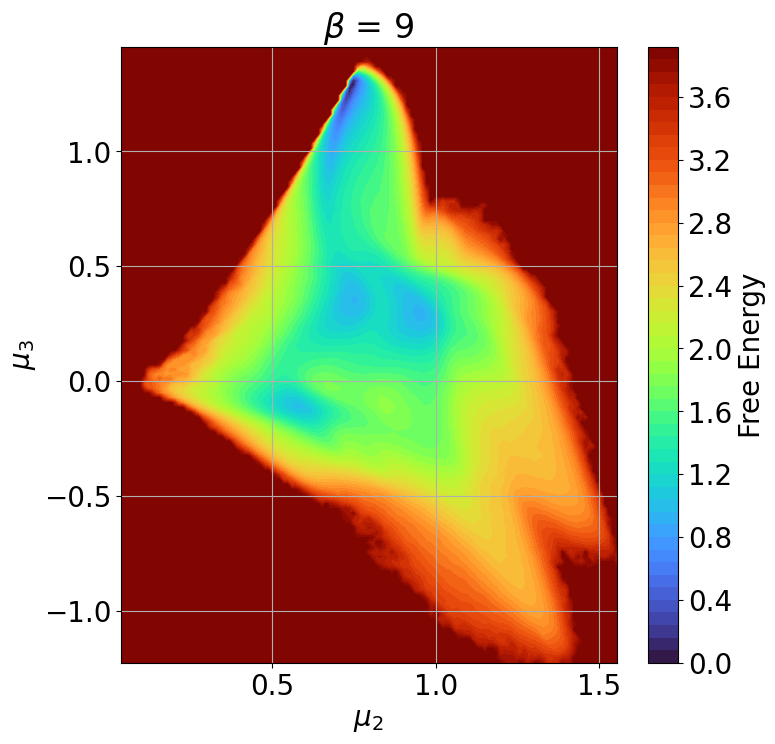

In [7]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.grid()
axes=plt.gca()

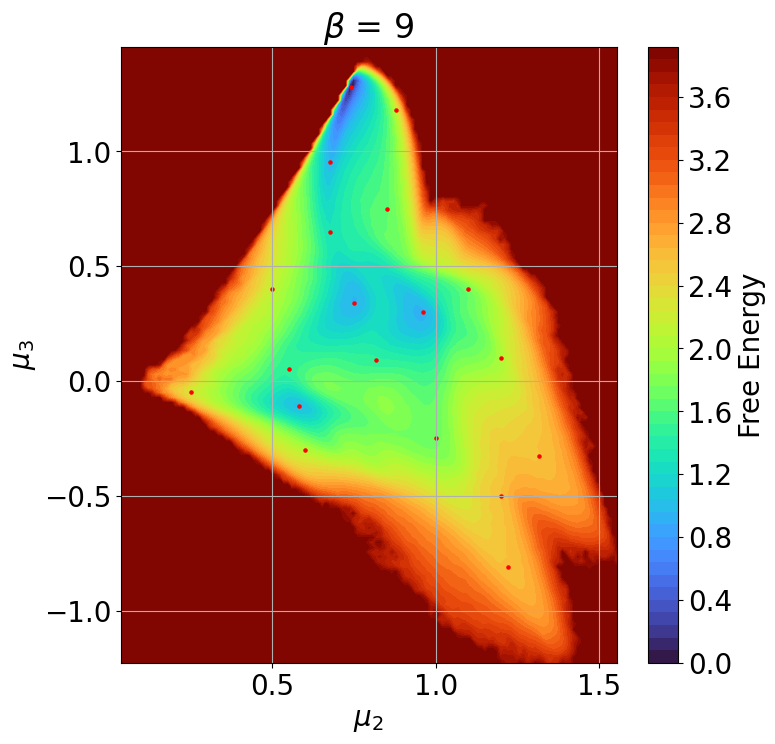

In [106]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.grid()
axes=plt.gca()
XYlist = np.array([[0.74,1.28],[0.877,1.182],[0.676,0.952],[0.676,0.65],[0.75,0.34],\
                   [0.96,0.30],[0.818,0.093],[0.55,0.05],[0.581,-0.11],[1.0,-0.25],[1.316,-0.326],\
                   [1.1,0.4],[0.6,-0.3],[0.5,0.4],[0.85,0.75],[0.25,-0.05],[1.2,0.1],[1.22,-0.81],[1.2,-0.5]]);
plt.scatter(XYlist[:,0],XYlist[:,1],s = 5, c = 'red')
np.savetxt('Figures/mu2mu3_list.csv', XYlist, delimiter=',')
plt.savefig("Figures/LJ7in2Dmu2mu3BETA9confs.pdf")

In [9]:

def extract_contour(contour):
    for item in contour.collections:
        count = 0
        for i in item.get_paths():
            v = i.vertices
            count = count + 1
            if count > 0:
                break
    return v

FEmax =  3.8538
level set for A , len =  1
level set for B , len =  2
level set for the outer boundary , len =  2
size(Abdry) =  (63, 2)
size(Bbdry) =  (64, 2)
size(Obdry) =  (622, 2)
max(mu3 of Bbdry) is  0.004845144168479122


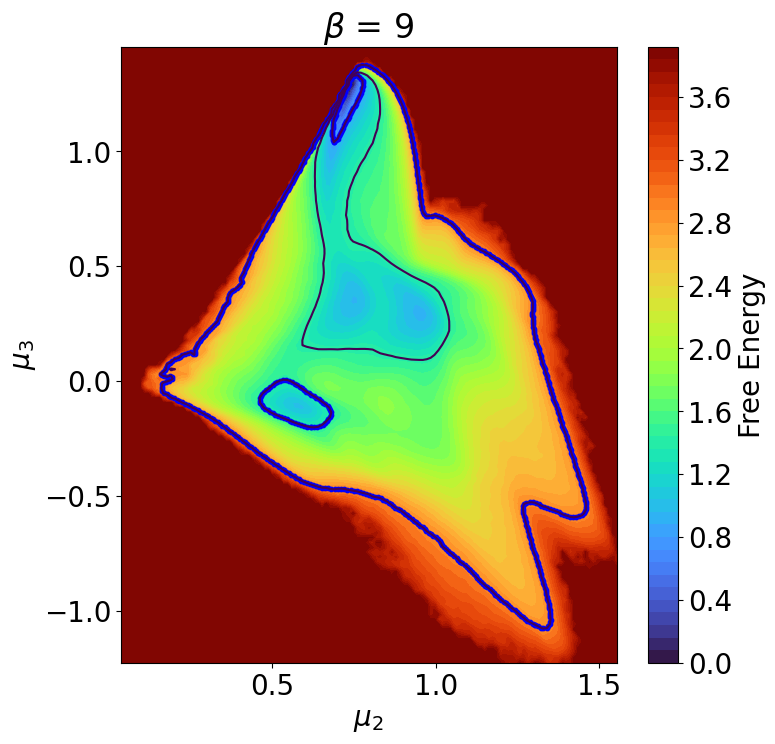

In [10]:
CV1grid = mu2grid
CV2grid = mu3grid

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()

FEmax = np.max(FE)
print("FEmax = ",FEmax)

if beta == 5:
    feA = 0.7
    feB = 1.05
    f_outer = FEmax*0.75
elif beta == 7:
    feA = 0.7
    feB = 1.2
    f_outer = FEmax*0.75
elif beta == 9:
    feA = 0.8
    feB = 1.4
    f_outer = FEmax*0.75
elif beta == 10:
    feA = 0.8
    feB = 1.4
    f_outer = FEmax*0.75

cA = plt.contour(mu2grid,mu3grid,FE, [feA])
cB = plt.contour(mu2grid,mu3grid,FE, [feB])
c0 = plt.contour(CV1grid,CV2grid,FE, [f_outer])

# vertsA = extract_contour(cA)
# vertsB = extract_contour(cB)
# plt.scatter(vertsA[:,0],vertsA[:,1],s = 10, c = 'blue')
        
# # plt.contour(CV1grid,CV2grid,FE7, [feB])
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')


h = 0.01;

# Bdry = plt.contour(CV1grid,CV2grid,FE, [FEmax*0.75])
# cB = plt.contour(CV1grid,CV2grid,FE, [feB])

level_set = cA.allsegs[0] # all connected components
print("level set for A , len = ",len(level_set))
Abdry = level_set[0] # the first connected component
Abdry = reparametrization(Abdry,h) 
plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'blue')

level_set = cB.allsegs[0] # all connected components
print("level set for B , len = ",len(level_set))
Bbdry = level_set[0] # the first connected component
Bbdry = reparametrization(Bbdry,h) 
plt.scatter(Bbdry[:,0],Bbdry[:,1],s = 10, c = 'blue')

level_set = c0.allsegs[0] # all connected components
print("level set for the outer boundary , len = ",len(level_set))
Obdry = level_set[0] # the first connected component
Obdry = reparametrization(Obdry,h) 
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'blue')

# v_bdry = extract_contour(Bdry)

# h = 0.01;
# Abdry = reparametrization(vertsA,h)
# Bbdry = reparametrization(vertsB,h)
# Obdry = reparametrization(v_bdry,h)

# plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'green')
# plt.scatter(Bbdry[:,0],Bbdry[:,1],s = 10, c = 'green')
# plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'green')

print("size(Abdry) = ", np.shape(Abdry))
print("size(Bbdry) = ", np.shape(Bbdry))
print("size(Obdry) = ", np.shape(Obdry))

Abdry.tofile("FEMdataBETA"+str(beta)+"/Abdry.csv", sep = ',')
Bbdry.tofile("FEMdataBETA"+str(beta)+"/Bbdry.csv", sep = ',')
Obdry.tofile("FEMdataBETA"+str(beta)+"/Obdry.csv", sep = ',')

print("max(mu3 of Bbdry) is ",np.max(Bbdry[:,1]))
    

In [11]:
# define collective variables: 2nd and 3rd central moments of coordination numbers
def Dist_Sq_Matrix(x): # matrix of distances squared
    Na = np.size(x,axis = 1)
    D2 = np.zeros((Na,Na))
    for j in range(Na):
        D2[j,:] = (x[0,:]-x[0,j])**2 + (x[1,:]-x[1,j])**2
    return D2

def CV(x):
    Na = np.size(x,axis = 1)
    D2 = Dist_Sq_Matrix(x)
    coord_num = np.zeros((Na,))
    for j in range(Na):
        ind = np.setdiff1d(range(Na),np.array([j]))
        aux = (D2[j,ind]/2.25)**4
        coord_num[j] = np.sum((np.ones((1,Na-1))-aux)/(np.ones((1,Na-1))-aux**2))
    cmean = np.mean(coord_num)
    mu2 = np.mean((coord_num-cmean)**2)
    mu3 = np.mean((coord_num-cmean)**3)
    return mu2,mu3


In [12]:
# load the list of minima and saddles of LJ7 in 2D
XYlist = np.loadtxt('Data/XYlist_min_sad.csv', delimiter=',', dtype=float)
Nlist = np.size(XYlist,axis = 0)
CVlist = np.zeros((Nlist,2))
for j in range(Nlist):
    CVlist[j,0],CVlist[j,1] = CV(np.reshape(XYlist[j,:],(2,7)))


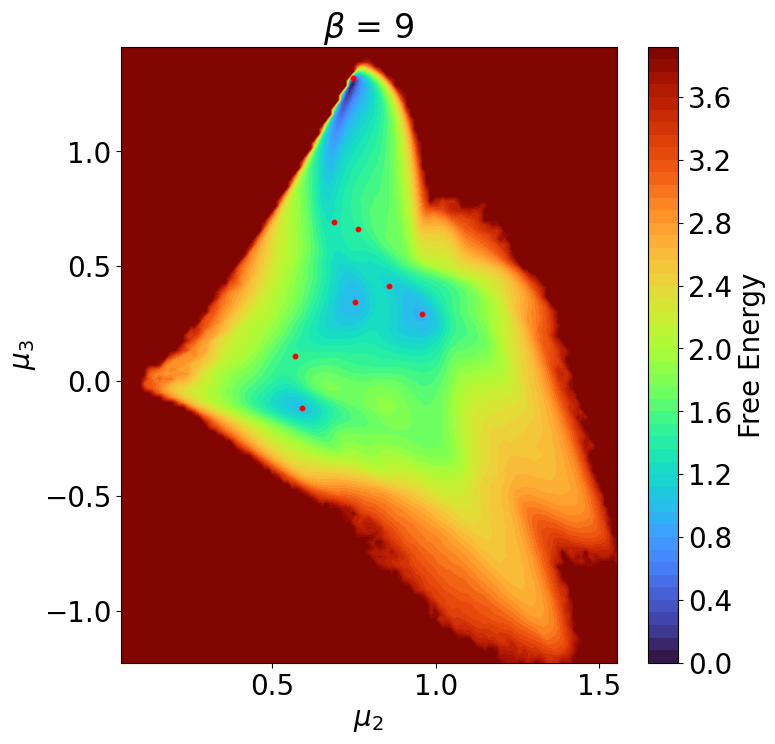

In [13]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
plt.contourf(mu2grid,mu3grid,FE, levels=60, cmap='turbo')

cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()
plt.scatter(CVlist[:,0],CVlist[:,1],s = 10, c = 'red')


In [14]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel(r'$\mu_2$')
    plt.ylabel(r'$\mu_3$')
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    scale = 0.01
    N2,N1 = np.shape(func)
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
#     plt.savefig(fig_name)

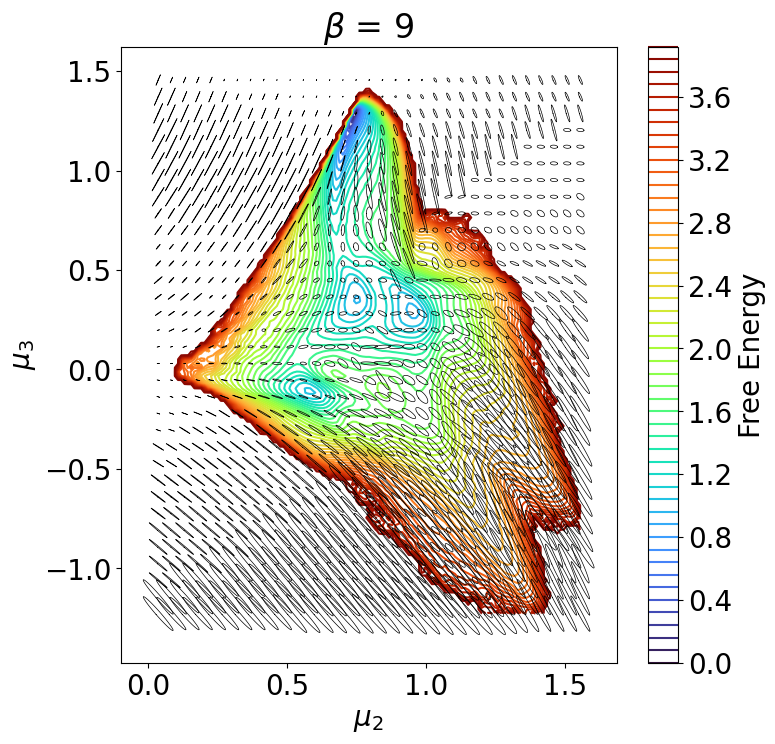

In [15]:
step = 4

fig_name = "Figures/LJ7_FE_DiffMatr_mu2mu3_beta"+str(beta)+".pdf"
visualize_diffusion_matrix(FE,M11,M12,M22,beta,step,CV1grid,CV2grid,"Free Energy",fig_name)

OmegaAB: Npts =  8803  Ntri =  16116
A: NptsA =  367  NtriA =  608
B: NptsB =  512  NtriB =  896


Text(0, 0.5, '$\\mu_3$')

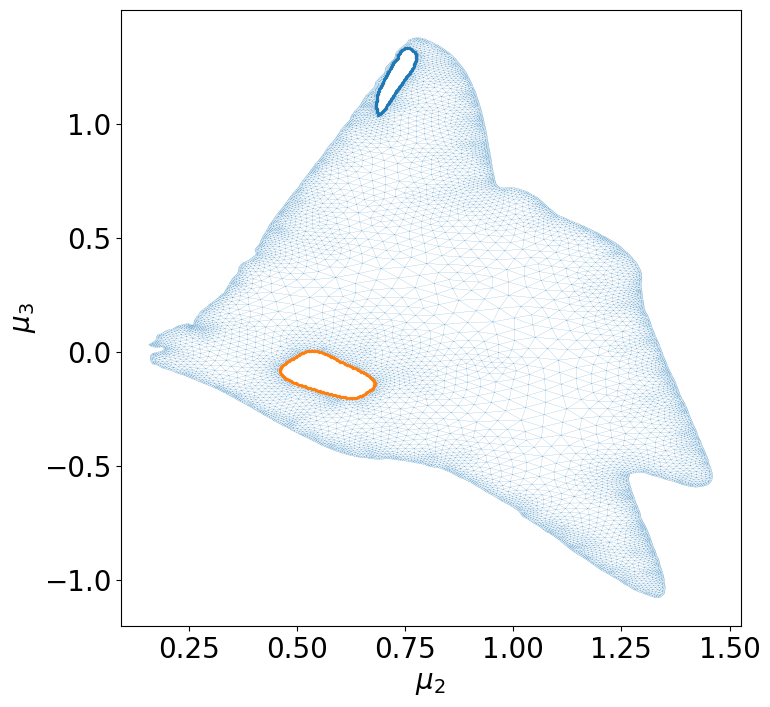

In [16]:
# The triangulation is done using Darren Engwirda's triangulation package mesh2D
# https://github.com/dengwirda/mesh2d?tab=readme-ov-file

dirname = "FEMdataBETA"+str(beta)+"/"
# Read the triangulation files
Aind = np.loadtxt(dirname + "LJ7_Abdry.csv", delimiter=',', dtype=int)
Bind = np.loadtxt(dirname + "LJ7_Bbdry.csv", delimiter=',', dtype=int)
pts = np.loadtxt(dirname + "LJ7_pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname + "LJ7_ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname + "LJ7_ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname + "LJ7_tri.csv", delimiter=',', dtype=int)
triA = np.loadtxt(dirname + "LJ7_triA.csv", delimiter=',', dtype=int)
triB = np.loadtxt(dirname + "LJ7_triB.csv", delimiter=',', dtype=int)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
# plt.savefig('LJ72D_trimesh_ABellipses.pdf')


In [17]:
# ise the bicubic interpolation to interpolate the free energy and the diffusion matrix 
# to the nodes of the triangulated mesh

Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

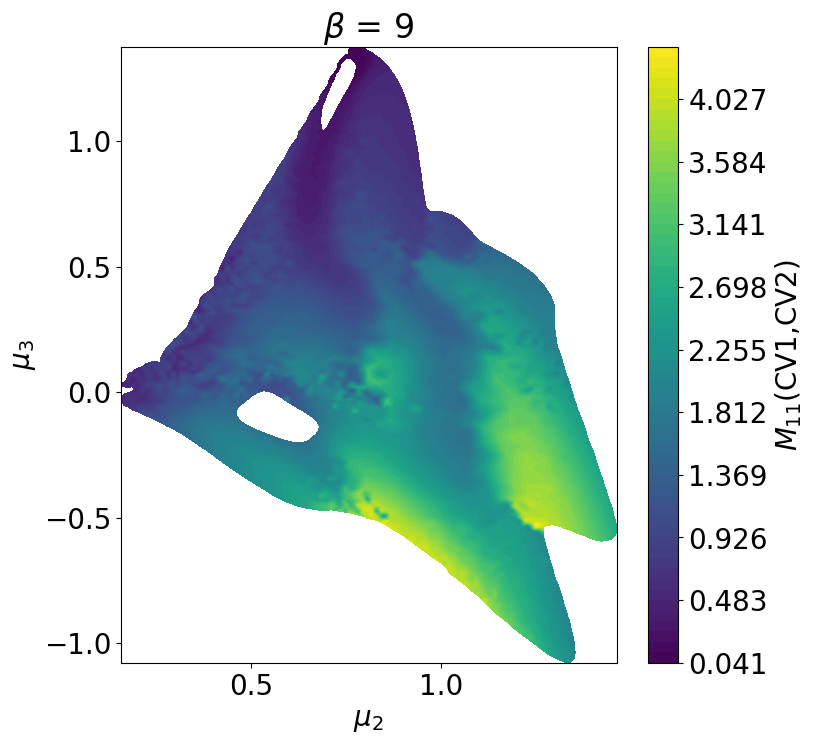

In [18]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M11pts,np.linspace(np.min(M11),np.max(M11),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{11}$(CV1,CV2)', size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


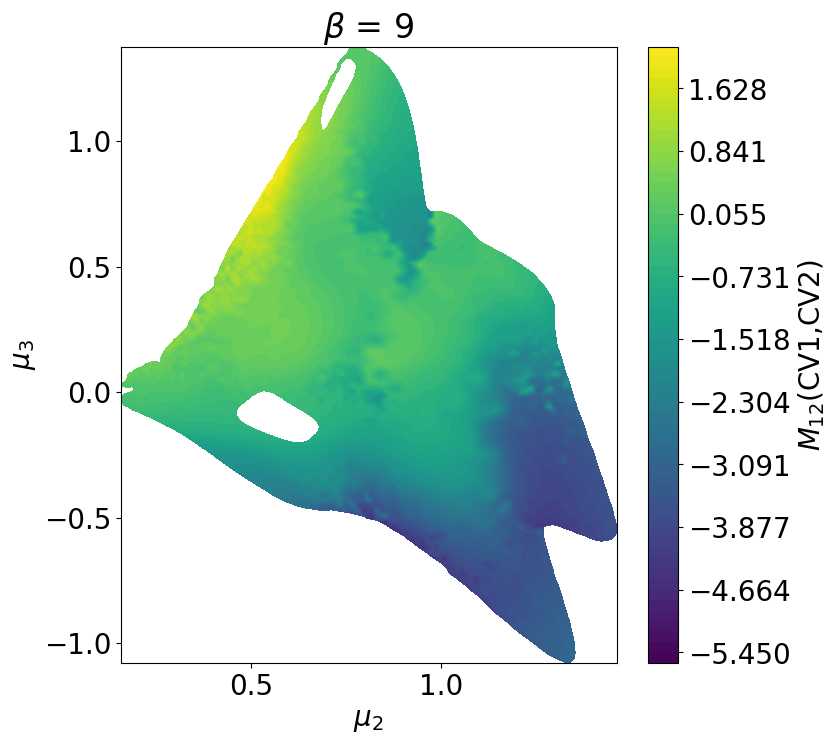

In [19]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M12pts,np.linspace(np.min(M12),np.max(M12),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{12}$(CV1,CV2)', size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


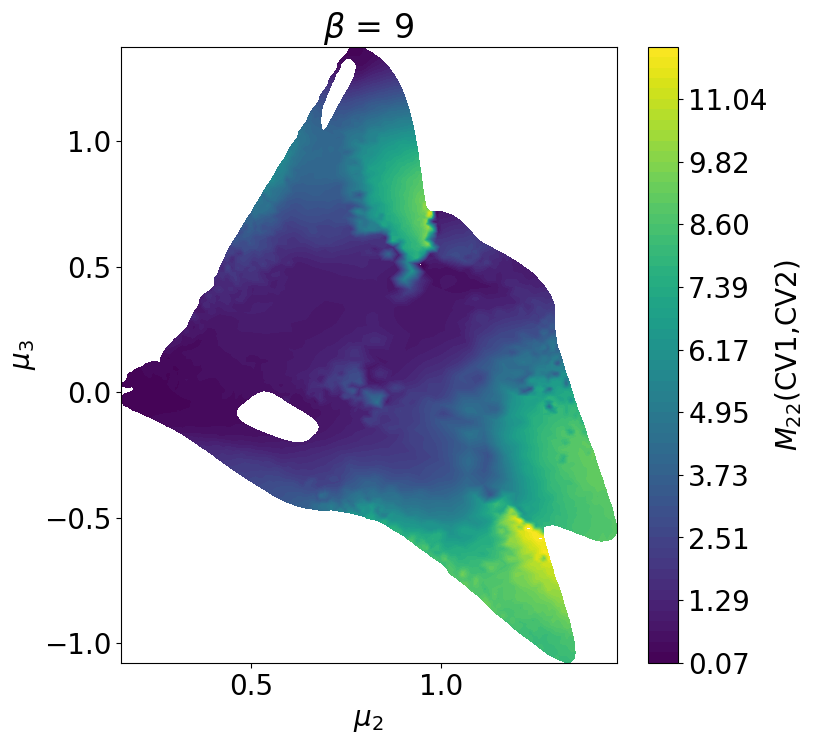

In [20]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,M22pts,np.linspace(np.min(M22),np.max(M22),60) )
cbar = plt.colorbar()
cbar.set_label(r'$M_{22}$(CV1,CV2)', size=20)
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [21]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)


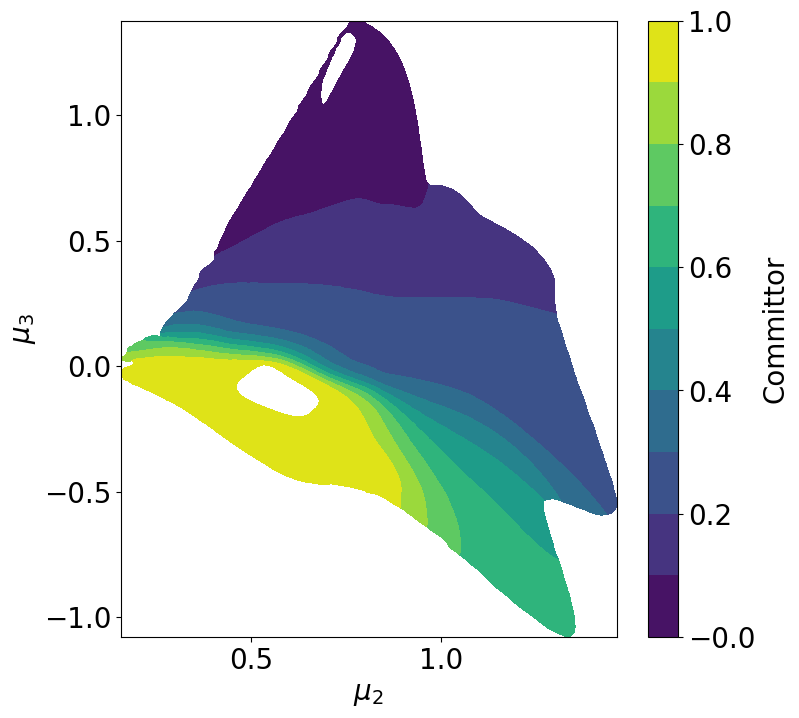

In [22]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([np.min(q),0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,np.max(q)]))
plt.colorbar(label="Committor", orientation="vertical")
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [23]:
def FEfun(v):
    v = np.squeeze(v)
    return bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,v[0],v[1])

Z = invariant_pdf(pts,tri,ptsA,triA,ptsB,triB,FEfun,beta)
print("Z = ",Z)

Z =  0.001245264058523379


In [24]:
# find the reactive current and the transition rate
Rcurrent, Rrate = reactive_current_and_transition_rate_var_diffusion_matrix(pts,tri,Fpts,M11pts,M12pts,M22pts,beta,q,Z)
print("Transition rate = ",Rrate)

Transition rate =  9.682222452753756e-05


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/quiver.py:632: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


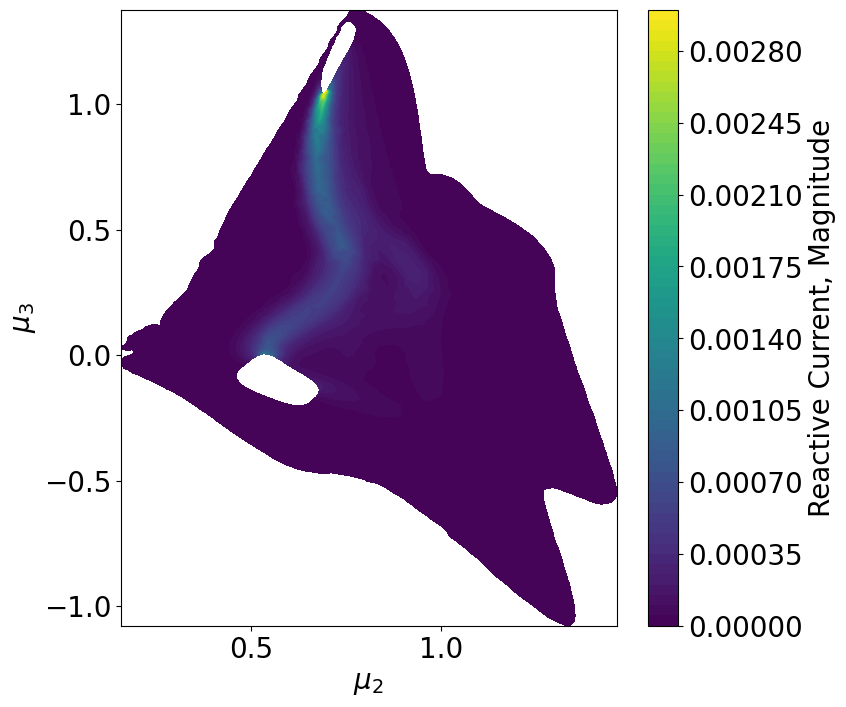

In [25]:
Acurrent = np.sqrt(np.sum(Rcurrent**2,axis = 1))
ind = np.argwhere(Acurrent > 0.015)
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Acurrent,levels = 60)
plt.colorbar(label="Reactive Current, Magnitude", orientation="vertical")
plt.quiver(pts[ind,0], pts[ind,1], Rcurrent[ind,0], Rcurrent[ind,1], [Acurrent[ind]])
plt.xlabel(r'$\mu_2$')
plt.ylabel(r'$\mu_3$')

# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('LJ72D_committor_MargotCV_2D.pdf')

In [26]:
# find the probability that a trajectory is reactive at any randomly picked time t
# \rho_{AB} = \int_{\Omega_{AB}}\mu*qplus*qminus*dx
prob_reactive = probability_reactive(pts,tri,FEfun,beta,q,Z)
print("Probability that a trajectory is reactive at a randomly picked time: ",prob_reactive)

Probability that a trajectory is reactive at a randomly picked time:  0.0008228927697057142


In [27]:
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastA = probability_last_A(pts,tri,ptsA,triA,FEfun,beta,q,Z)
print("Probability that a trajectory last visited A: ",prob_lastA)
# \rho_{A} = \int_{\Omega}\mu*qminus*dx
prob_lastB = 1 - prob_lastA
print("Probability that a trajectory last visited B: ",prob_lastB)
# Escape rates
kA = Rrate/prob_lastA
kB = Rrate/prob_lastB
print("Escape rates: kA = ",kA," kB = ",kB)

Probability that a trajectory last visited A:  0.9983865115249375
Probability that a trajectory last visited B:  0.0016134884750624856
Escape rates: kA =  9.697869853995833e-05  kB =  0.06000800503008732


In [28]:
# beta 7
# Probability that a trajectory last visited A:  0.9750070269567105
# Probability that a trajectory last visited B:  0.024992973043289513
# Escape rates: kA =  0.003596905930320249  kB =  0.1403197831362492
# beta 5
# Probability that a trajectory last visited A:  0.7253515720507127
# Probability that a trajectory last visited B:  0.27464842794928734
# Escape rates: kA =  0.10182649151904745  kB =  0.2689256452375819